# Týden 2
## 0. Obsah

- Příklady často používaných knihoven a práce s nimi
    - **Minule**: Numpy
    - Matplotlib
    - CV2 (OpenCV)
    - Pandas
    - **Příště** Úvod do PyGame a GameDev

## 1. Příklady často používaných knihoven a práce s nimi
### 1. Matplotlib

In [1]:
from matplotlib import pyplot as plt
import numpy as np

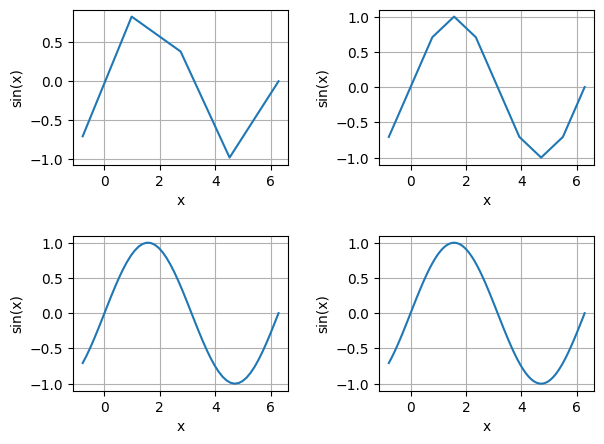

In [2]:
# Spojový graf:
x = lambda x: np.linspace(-np.pi/4, 2*np.pi, x)

fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

for i, x_ in enumerate([5, 10, 50, 100]):
    y = np.sin(x(x_))

    axes[i].plot(x(x_), y, label="sin(x)")
    axes[i].grid()
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("sin(x)")

plt.tight_layout(pad=2)
plt.show()

[[37 26 17 12]
 [40 38 20 38]
 [38 21 13 25]
 [25 40 40 38]]


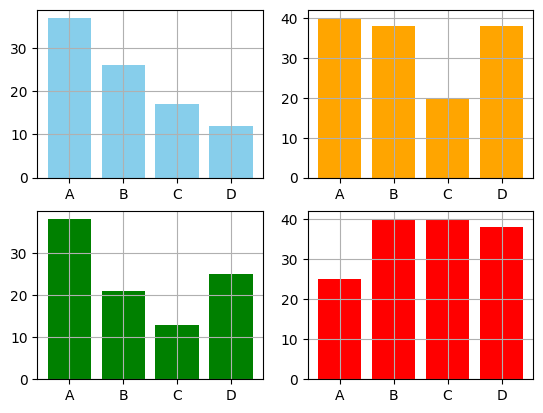

In [3]:
# Sloupcový graf:
kategorie = ["A", "B", "C", "D"]
hodnoty   = np.random.randint(10, 50, (4, 4))
barvy     = ["skyblue", "orange", "green", "red"]
print(hodnoty)

fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

for i, x_ in enumerate(hodnoty):
    axes[i].grid()
    axes[i].bar(kategorie, hodnoty[i], color=barvy[i])

plt.show()

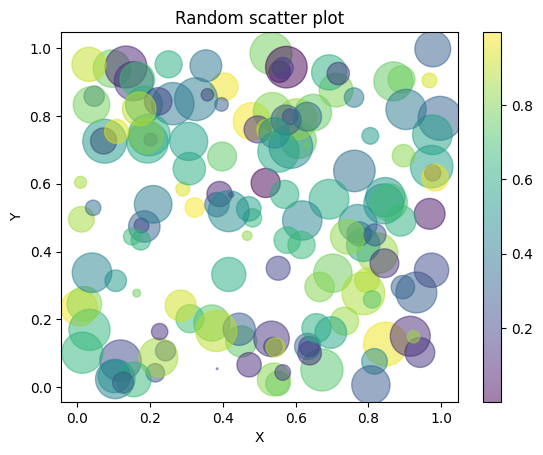

In [4]:
# Scatter-plot:
x = np.random.rand(150)
y = np.random.rand(150)
colors = np.random.rand(150)
sizes = np.random.rand(150) * 1000

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)
plt.title("Random scatter plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

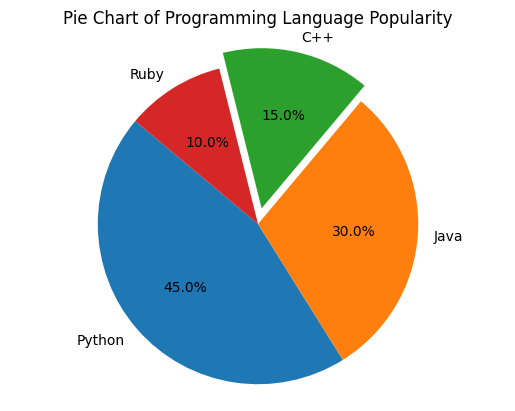

In [5]:
# Koláčový graf:
labels = ['Python', 'Java', 'C++', 'Ruby']
sizes = [45, 30, 15, 10]
explode = (0, 0, 0.1, 0)  # explode third slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Programming Language Popularity')
plt.show() 

[]

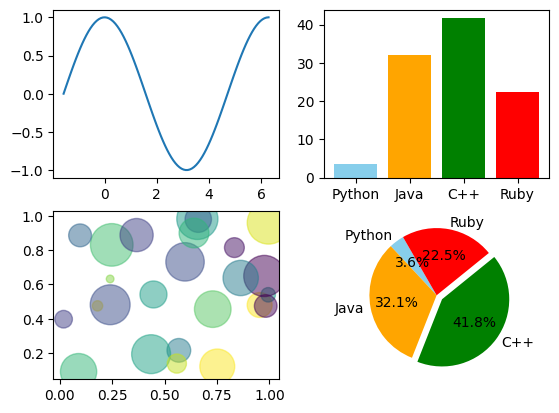

In [6]:
# Různé subplots
fig, axes = plt.subplots(2, 2)
axes = np.array(axes).reshape(-1)

x = np.linspace(-np.pi/2, 2*np.pi, 100)
axes[0].plot(x, np.cos(x))

sizes = np.random.rand(4)
sizes = sizes/sizes.sum() * 100
axes[1].bar(labels, sizes, color=barvy)

x = np.random.rand(25)
y = np.random.rand(25)
axes[2].scatter(x, y, c=np.random.rand(len(x)), s=np.random.rand(len(x))*1000, alpha=0.5)

axes[3].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=120, colors=barvy)

plt.plot()

### 2. OpenCV (CV2)

In [7]:
import cv2 as cv, numpy as np
from matplotlib import pyplot as plt

# Kód pro pohodlné prezentování obrázků:
def show(*images, scale=1, cols=2, titles=None):
    n_images = len(images)
    if n_images == 1: cols = 1
    rows = (n_images + cols - 1) // cols

    # Assume all images are roughly same size (or take the first as reference)
    height, width = images[0].shape[:2]
    
    # Set figure size to match the total pixel size exactly
    dpi = 100
    fig_width = (width * cols) / (dpi / scale)
    fig_height = (height * rows) / (dpi / scale)

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    axes = np.array(axes).reshape(-1)  # Flatten in case it's 2D array

    fig.patch.set_facecolor('none')

    for i, ax in enumerate(axes):
        ax.set_facecolor('none')
        ax.axis('off')

        if i < n_images:
            img_rgb = cv.cvtColor(images[i].astype(np.uint8), cv.COLOR_BGR2RGB)
            img_rgb = cv.resize(img_rgb, (int(width*scale), int(height*scale)), interpolation=cv.INTER_NEAREST)
            ax.imshow(img_rgb)
            if titles and i < len(titles):
                ax.set_title(titles[i], fontsize=8)
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.01, hspace=0.01)
    plt.show()

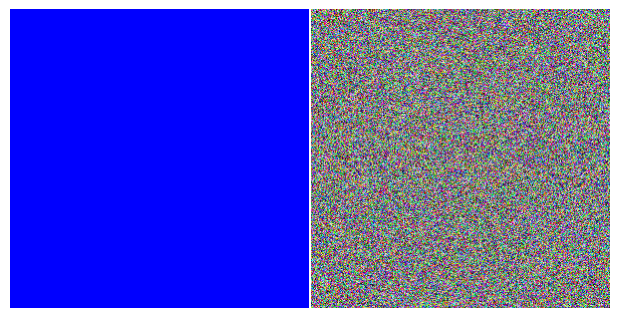

In [8]:
# Showing an image

# 3 channels of 8-bit color, 300x300 resolution, blank:
img = np.zeros((300, 300, 3), dtype=np.uint8)

# Fill with blue (BGR):
img[:] = (255, 0, 0)

# Fill with random noice
img2 = np.random.random((300, 300, 3)) * 255
show(img, img2, cols=2)

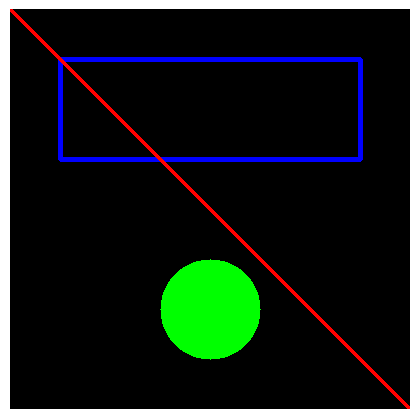

In [9]:
# drawing shapes:
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw a blue rectangle
cv.rectangle(img, (50, 50), (350, 150), (255, 0, 0), thickness=3)

# Draw a green circle
cv.circle(img, (200, 300), 50, (0, 255, 0), thickness=-1)

# Draw a red line
cv.line(img, (0, 0), (400, 400), (0, 0, 255), thickness=2)

show(img, scale=1)

(512, 512, 3) (512, 512)


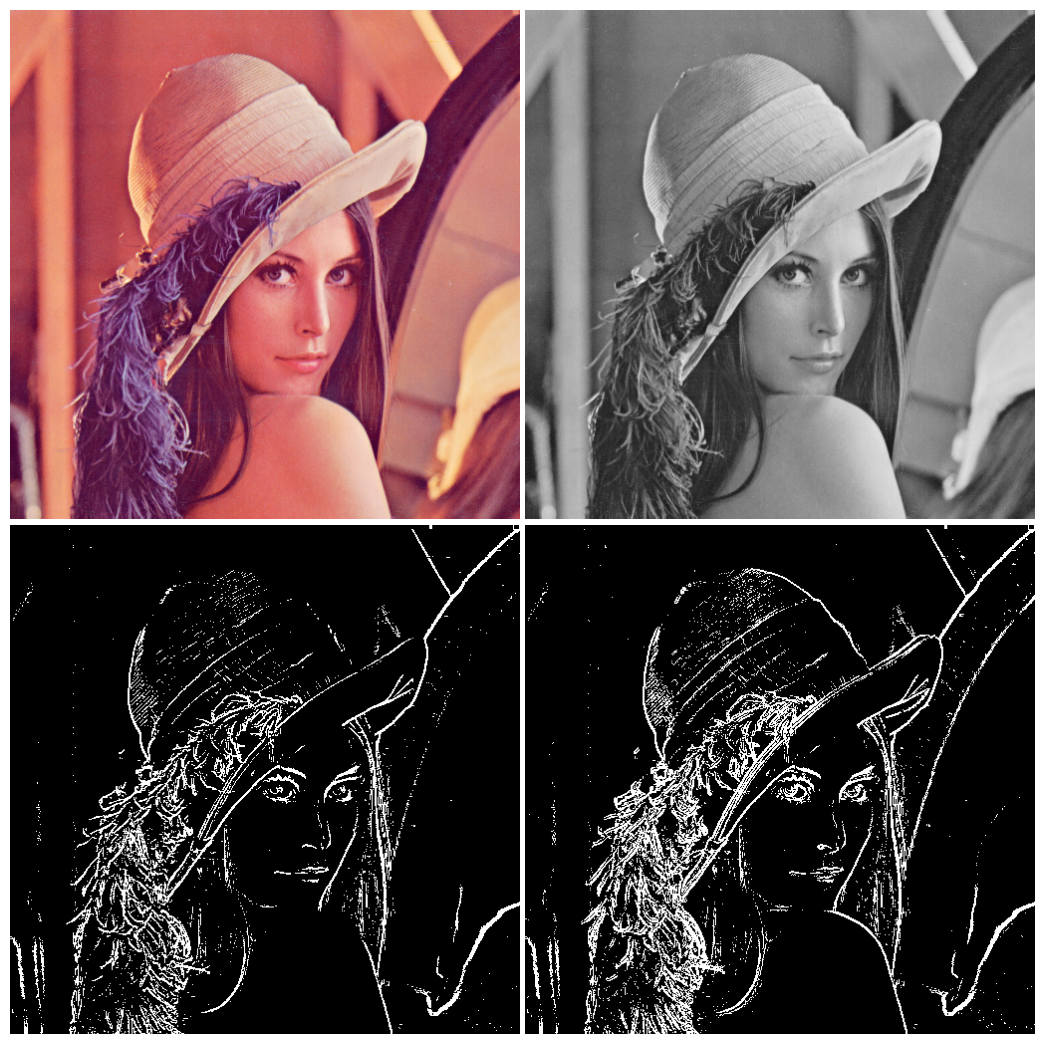

In [ ]:
# loading image
img = cv.imread("images/lena_color_512.tif")
if img is None:
    print("None")
    exit()


# image processing:
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape, img_grayscale.shape)


 # edge detection:
def roberts(img, thresh, basic = False):
    mask_diagonal = np.array([[0, 1], [-1, 0]])
    mask_cardinal = np.array([[-1, 1]])

    g1 = cv.filter2D(img, ddepth=-1, kernel=mask_diagonal)
    g2 = cv.filter2D(img, ddepth=-1, kernel=np.rot90(mask_diagonal))

    g3 = cv.filter2D(img, ddepth=-1, kernel=mask_cardinal)
    g4 = cv.filter2D(img, ddepth=-1, kernel=mask_cardinal.T)

    edges1 = np.hypot(g1, g2) >= thresh
    edges2 = np.hypot(g3, g4) >= thresh

    edges = edges1 if basic else (edges1 | edges2)
    return edges.astype(np.uint8) * 255


img_rob_basic = roberts(img_grayscale, 20, basic=True)
img_rob = roberts(img_grayscale, 20)

show(img, img_grayscale, img_rob_basic, img_rob)

# Other edge detection kernels: Prewitt, Sobel, Kirsch, *Canny*

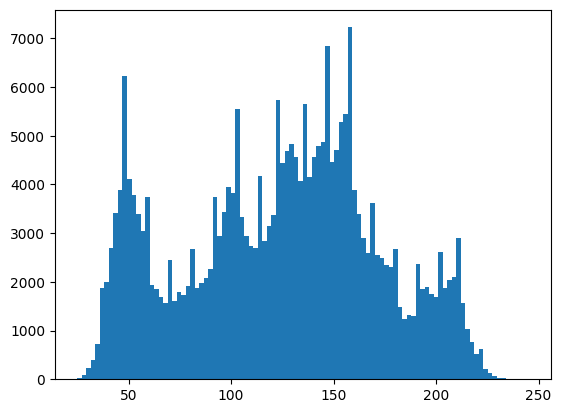

In [11]:
# histogram
plt.hist(img_grayscale.flatten(), 100)
plt.show()

### 3. Pandas
todo

In [12]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load CSV with Pandas
df = pd.read_csv('files/diabetes.csv')

In [13]:
# Display first few rows
print(
    df.head()
)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1  


In [14]:
# Display stat summary
print(
    df.describe(),      # The whole DataFrame
    df.BMI.describe(),  # Just one column

    sep="\n\n===\n\n"
)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.

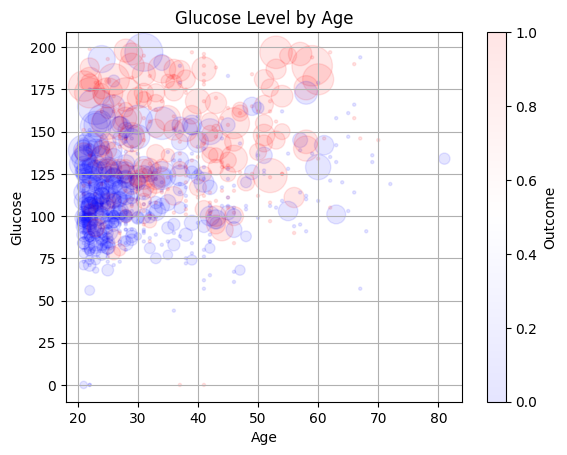

In [15]:
# Plotting with Pandas and Pyplot
plt.scatter(df.Age, df.Glucose, s=df.Insulin + 5, c=df.Outcome, cmap="bwr", alpha=0.1)
plt.title("Glucose Level by Age")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.colorbar(label="Outcome")
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

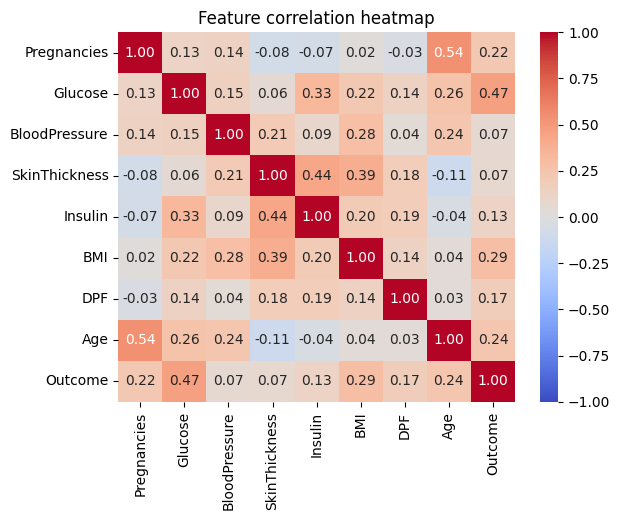

In [16]:
# Correlation analysis
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm", vmin=-1)
plt.title("Feature correlation heatmap")
plt.show

In [17]:
# Filtering
print(
    df.isnull().sum(),
    (df == 0).sum(),
    (df.BloodPressure == 0).sum(),


    sep="\n\n===\n\n"
)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

===

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome          500
dtype: int64

===

35


In [18]:
high_risk = df[
    (df.Glucose > 140) & (df.BMI > 30)
]

print(f"High-risk patients: {len(high_risk)}")
high_risk[["Glucose", "BMI", "Age"]]

High-risk patients: 148


,Glucose,BMI,Age
0,148,33.6,50
8,197,30.5,53
11,168,38.0,34
13,189,30.1,59
22,196,39.8,41
...,...,...,...
748,187,36.4,36
753,181,43.3,26
754,154,32.4,45
759,190,35.5,66


In [19]:
# Feature engineering
df["BMI_Category"] = pd.cut(
    df.BMI,
    bins=[0, 18.5, 25, 30, 35, 100],
    labels=[
        "Underweight",
        "Normal",
        "Overweight",
        "Obese",
        "Extremely obese"
    ]
)

df["RiskScore"] = df.Glucose*0.3 + df.BMI*0.2 + df.Age*0.1

df["Age_Category"] = pd.cut(
    df.Age,
    bins=[20, 30, 40, 50, 60, 70, 100],
    labels=[
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70+"
    ]
)

print(
    df[["BMI", "BMI_Category", "Age_Category", "RiskScore"]],
    df[df.BMI_Category == "Extremely obese"],

    sep="\n\n===\n\n"
)

      BMI     BMI_Category Age_Category  RiskScore
0    33.6            Obese          40s      56.12
1    26.6       Overweight          30s      33.92
2    23.3           Normal          30s      62.76
3    28.1       Overweight          20s      34.42
4    43.1  Extremely obese          30s      53.02
..    ...              ...          ...        ...
763  32.9            Obese          60s      43.18
764  36.8  Extremely obese          20s      46.66
765  26.2       Overweight          20s      44.54
766  30.1            Obese          40s      48.52
767  30.4            Obese          20s      36.28

[768 rows x 4 columns]

===

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
4              0      137             40             35      168  43.1  2.288   
7             10      115              0              0        0  35.3  0.134   
10             4      110             92              0        0  37.6  0.191   
11            10      168         

In [20]:
print(
    df.Outcome.value_counts(),
    df.Outcome.value_counts(normalize=True),

    sep="\n\n===\n\n"
)

Outcome
0    500
1    268
Name: count, dtype: int64

===

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [21]:
# Pivot table
print(
    df.pivot_table(values=["Glucose"], index="BMI_Category", columns=["Outcome"], aggfunc="mean", observed=False),
    df.pivot_table(values=["Pregnancies"], index="BMI_Category", columns=["Age_Category"], aggfunc="mean", observed=False),

    sep="\n\n===\n\n"
)

                    Glucose            
Outcome                   0           1
BMI_Category                           
Underweight       95.250000         NaN
Normal           103.594059  157.571429
Overweight       112.669118  131.840909
Obese            110.157025  142.000000
Extremely obese  113.077519  143.591304

===

                Pregnancies                                             
Age_Category            20s       30s       40s       50s       60s  70+
BMI_Category                                                            
Underweight        0.750000       NaN       NaN       NaN       NaN  NaN
Normal             1.898551  4.823529  8.333333  6.750000  2.666667  2.0
Overweight         2.250000  5.219512  7.526316  6.333333  5.400000  9.0
Obese              2.186916  5.647059  6.093023  6.461538  4.285714  NaN
Extremely obese    1.671875  5.083333  7.777778  6.421053  5.750000  NaN


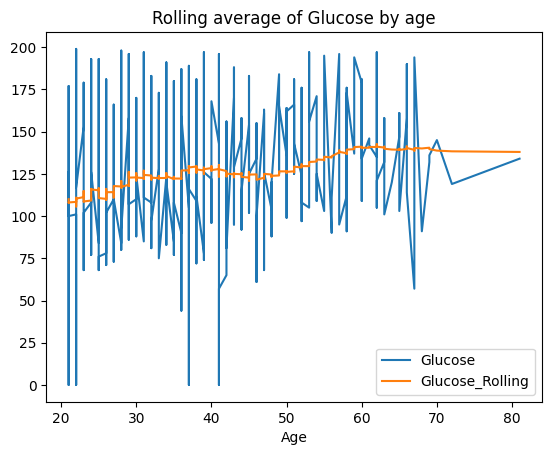

In [22]:
# Rolling average
df_sorted = df.sort_values("Age")
df_sorted["Glucose_Rolling"] = df_sorted["Glucose"].rolling(window=60).mean()
df_sorted[["Age", "Glucose", "Glucose_Rolling"]].plot(x="Age", title="Rolling average of Glucose by age")
plt.show()

In [23]:
# Aggregation
df.groupby(["Age_Category", "Outcome"], observed=False)["Glucose"].mean()

Age_Category  Outcome
20s           0          106.978593
              1          140.322222
30s           0          114.148148
              1          139.000000
40s           0          108.000000
              1          137.812500
50s           0          124.565217
              1          153.451613
60s           0          130.666667
              1          155.285714
70+           0          126.500000
              1                 NaN
Name: Glucose, dtype: float64

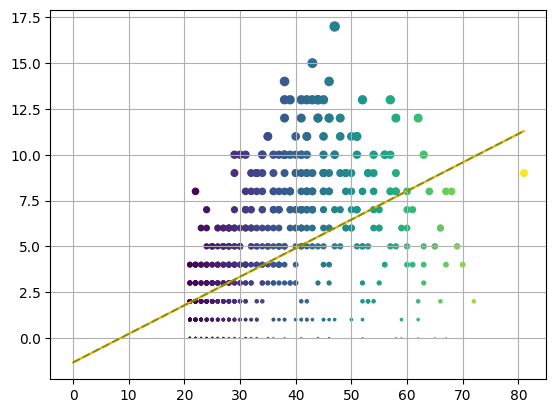

In [24]:
from statistics import linear_regression

x = np.linspace(0, df.Age.max(), 2)

lr = linear_regression(df.Age, df.Pregnancies)
y_stat = lr.slope * x + lr.intercept

slope_manual = df.Age.cov(df.Pregnancies) / df.Age.var()
intercept_manual = df.Pregnancies.mean() - (df.Age.mean() * slope_manual)
y_manual = slope_manual * x + intercept_manual

plt.grid(True)
plt.scatter(df.Age, df.Pregnancies, marker=".", c=df.Age, s=df.Pregnancies * 10 + 1)
plt.plot(x, y_manual, c="orange")
plt.plot(x, y_stat, ls="--", c="green", alpha=0.5)
plt.show()